# ATT dataset

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.metrics as metrics
from keras.callbacks import ModelCheckpoint
from numpy import expand_dims
from keras.models import Model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from pickle import load
from pickle import dump

Using TensorFlow backend.


## Model building 

In [2]:
classifier = Sequential()

In [3]:
classifier.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation="relu"))

In [4]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))

In [6]:
classifier.add(BatchNormalization())

In [7]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [8]:
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))

In [9]:
classifier.add(BatchNormalization())

In [10]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [11]:
classifier.add(Conv2D(128, (3, 3), padding='same', activation = 'relu'))

In [12]:
classifier.add(BatchNormalization())

In [13]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [14]:
classifier.add(Flatten())

In [15]:
classifier.add(Dense(activation="relu", units=512))

In [16]:
classifier.add(Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
classifier.add(Dense(activation="softmax", units=100))

In [18]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 64)         

### Model Training

In [20]:
bat_size = 32
input_size = 32

# initializing a train datagenerator
train_datagen = ImageDataGenerator(rescale=1./255)

# applying data generation (augmentation) to test set:
test_datagen = ImageDataGenerator(rescale=1./255)

# preprocessing for trainig set
train_set = train_datagen.flow_from_directory(
                            '../../datasets/dataset3/orig_images/training', # train data directory
                            target_size=(input_size, input_size), 
                            batch_size=bat_size,
                            class_mode='categorical'
                                            )

# preprocessing for test set
test_set = test_datagen.flow_from_directory(
                            '../../datasets/dataset3/orig_images/testing', # train data directory
                            target_size=(input_size, input_size),
                            batch_size=bat_size,
                            shuffle=False,
                            class_mode='categorical'
                                            )

Found 1400 images belonging to 100 classes.
Found 1200 images belonging to 100 classes.


In [21]:
# saving the best weights of the model (where the validation accuracy is best)
filepath = "CNN-DS3-bestweights.hdf5"
checkpoint = ModelCheckpoint(
                            filepath,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max'
                            )

In [22]:
# training our model with 25 epocks
model = classifier.fit_generator(
                                train_set,
                                steps_per_epoch=1400//bat_size + 1,
                                epochs=25,
                                callbacks=[checkpoint],
                                validation_data=test_set,
                                validation_steps=1200//bat_size + 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/25
44/44 [==============================] - 4s 91ms/step - loss: 4.0216 - acc: 0.1269 - val_loss: 8.3721 - val_acc: 0.0467

Epoch 00001: val_acc improved from -inf to 0.04667, saving model to CNN-DS3-bestweights.hdf5
Epoch 2/25
44/44 [==============================] - 1s 33ms/step - loss: 1.7051 - acc: 0.5523 - val_loss: 7.8716 - val_acc: 0.0658

Epoch 00002: val_acc improved from 0.04667 to 0.06583, saving model to CNN-DS3-bestweights.hdf5
Epoch 3/25
44/44 [==============================] - 2s 37ms/step - loss: 0.6101 - acc: 0.8284 - val_loss: 7.3859 - val_acc: 0.0867

Epoch 00003: val_acc improved from 0.06583 to 0.08667, saving model to CNN-DS3-bestweights.hdf5
Epoch 4/25
44/44 [==============================] - 2s 39ms/step - loss: 0.2114 - acc: 0.9500 - val_loss: 7.9093 - val_acc: 0.0767

Epoch 00004: val_acc did not improve from 0.08667
Epoch 5/25
44/44 [=========================

### Accuracy and loss Graphs

In [23]:
# saving best model history
with open('CNN-DS3-history', 'wb') as handle: 
    dump(classifier.history, handle)

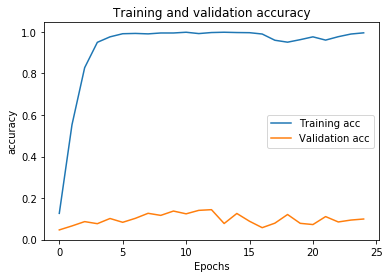

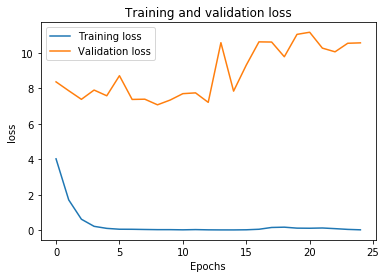

In [24]:
    
# loading the model history
with open('CNN-DS3-history', 'rb') as handle:
    oldhstry = load(handle)
    
# plotting the train and test accuracy and loss
acc = oldhstry.history['acc']
val_acc = oldhstry.history['val_acc']
plt.plot(acc,  label='Training acc')
plt.plot(val_acc,  label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
# plt.savefig('DS3-train and test accuracy.png', bbox_inches='tight', dpi=300)
plt.show()

acc = oldhstry.history['loss']
val_acc = oldhstry.history['val_loss']
plt.plot(acc,  label='Training loss')
plt.plot(val_acc,  label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
# plt.savefig('DS3-train and test loss.png', bbox_inches='tight', dpi=300)
plt.show()

### Confusion matrix

In [26]:
classifier = load_model('CNN-DS3-bestweights.hdf5')            # loading the model with the best weights
Y_pred = classifier.predict_generator(test_set, 1200//bat_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
conf_mat = confusion_matrix(test_set.classes, y_pred)
print(conf_mat)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


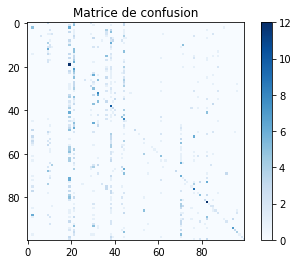

In [27]:
plt.imshow(conf_mat, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Matrice de confusion')
# plt.savefig('DS3-conf.jpg', dpi=300)

#### Model Report

In [29]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())  

In [30]:
# Calculating the model report
report = metrics.classification_report(true_classes, y_pred, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

          S1       0.00      0.00      0.00        12
         S10       0.00      0.00      0.00        12
        S100       0.13      0.42      0.20        12
         S11       0.00      0.00      0.00        12
         S12       0.00      0.00      0.00        12
         S13       0.00      0.00      0.00        12
         S14       1.00      0.17      0.29        12
         S15       0.00      0.00      0.00        12
         S16       0.00      0.00      0.00        12
         S17       0.08      0.33      0.13        12
         S18       0.07      0.17      0.10        12
         S19       0.12      0.08      0.10        12
          S2       0.00      0.00      0.00        12
         S20       0.00      0.00      0.00        12
         S21       0.00      0.00      0.00        12
         S22       0.00      0.00      0.00        12
         S23       0.00      0.00      0.00        12
         S24       0.00    

c:\users\ouss\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Displaying feature maps

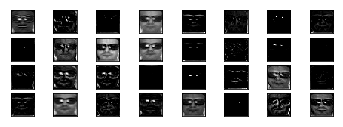

In [32]:
# new model used for displaying the feature maps
model = Model(inputs=classifier.inputs, outputs=classifier.layers[0].output)

# load the image with the required shape
img = load_img('../../datasets/dataset3/orig_images/testing/S1/S1-08.jpg', target_size=(32, 32))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# model feature maps 
feature_maps = model.predict(img)

square = 8
ix = 1
for _ in range(8):
    for _ in range(4):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# plt.savefig('DS1-featuresMaps_L4.jpg', dpi=300)
plt.show()
